In [ ]:
import tensorflow as tf
import sys, imageio, os
sys.path.append("/Users/kai/Downloads/graduation/code")
from models.model import *
from models.data_prepare import *
import keras

2023-01-09 10:44:34.217382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 10:44:34.317589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 10:44:34.317605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-09 10:44:34.342014: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-09 10:44:35.986792: W tensorflow/stream_executor/platform/de

In [ ]:
X, y = data("vary_width")
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
X_train_new[1]

Array([159, 161, 158, 158, 159, 156, 157, 156, 157, 157, 156, 160, 160,
       158, 160, 160, 159, 157, 160, 160, 159, 162, 161, 159, 159, 164,
       161, 162, 163, 164, 165, 167, 164, 170, 169, 171, 171, 173, 175,
       173, 169, 174, 173, 176, 173, 172, 168, 161, 153, 141, 131, 113,
        90,  79,  76,  76,  71,  65,  63,  70,  79,  93, 101, 107, 108,
       107, 108, 108, 113, 118, 119, 123, 129, 134, 138, 143, 149, 150,
       156, 159, 160, 166, 164, 164, 166, 166, 162, 160, 163, 159, 157,
       156, 153, 152, 152, 155, 155, 156, 157, 158, 159, 161, 161, 160,
       161, 163, 160, 162, 162, 161, 161, 159, 161, 160, 158, 155, 153,
       156, 157, 159], dtype=uint8)

In [ ]:
X_train_new.shape, y_train_new.shape,X_test_new.shape, y_test_new.shape

((379, 120), (379, 1), (163, 120), (163, 1))

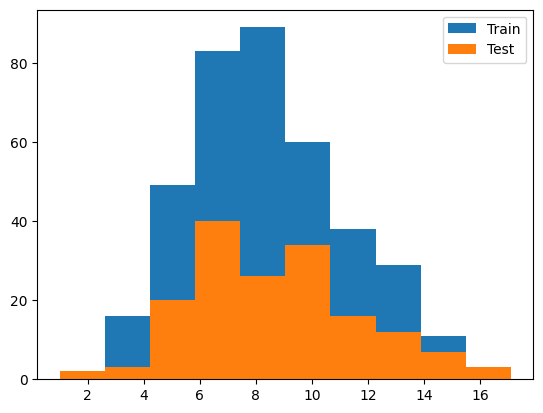

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_new,label="Train")
plt.hist(y_test_new,label="Test")
plt.legend()
plt.show()

In [ ]:
"The brightness should be random because the data I extract are similar."
IMAGESIZE=120
OUTPUTSIZE=100
def data_aug(X_train):
    data_preprocessing = keras.Sequential([
                tf.keras.Input(shape=(IMAGESIZE,1)),
                random_crop(IMAGESIZE, OUTPUTSIZE),
                random_flip_layer(),])
    return data_preprocessing(X_train)
X_train_new = data_preparation(X_train_new)
X_test_new = data_preparation(X_test_new)
X_train_new.shape, y_train_new.shape,X_test_new.shape, y_test_new.shape

2023-01-09 10:44:40.032795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-09 10:44:40.032818: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-09 10:44:40.032833: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (morricone.ipa.amolf.nl): /proc/driver/nvidia/version does not exist
2023-01-09 10:44:40.032976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(TensorShape([379, 100, 1]), (379, 1), TensorShape([163, 100, 1]), (163, 1))

In [ ]:
X_train,y_train = data("varying_lum_and_focus_train")
X_test,y_test = data("varying_lum_and_focus_test")
X_train = data_preparation(X_train)
X_test = data_preparation(X_test)
X_train.shape,y_train.shape, X_test.shape,y_test.shape

(TensorShape([1253, 100, 1]), (1253, 1), TensorShape([524, 100, 1]), (524, 1))

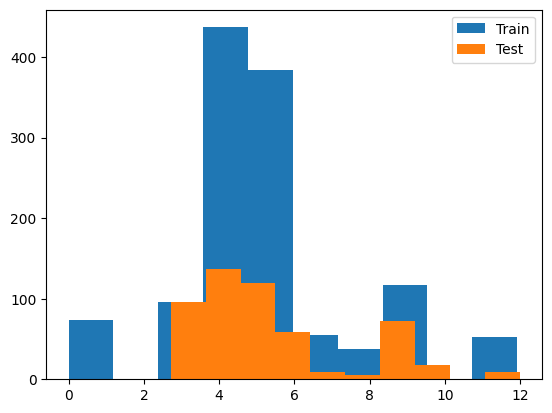

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train,label="Train")
plt.hist(y_test,label="Test")
plt.legend()
plt.show()

In [ ]:
X_train_combine = tf.concat([X_train,X_train_new], 0, name='X_train')
X_test_combine = tf.concat([X_test,X_test_new], 0, name='X_test')
y_train_combine = tf.concat([y_train,y_train_new], 0, name='y_train')
y_test_combine = tf.concat([y_test,y_test_new], 0, name='y_test')

In [ ]:
X_train_combine.shape,y_train_combine.shape,X_test_combine.shape,y_test_combine.shape,

(TensorShape([1632, 100, 1]),
 TensorShape([1632, 1]),
 TensorShape([687, 100, 1]),
 TensorShape([687, 1]))

In [44]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        # "no longer improving" being defined as "no better than 1e-3 less"
        # "no longer improving" being further defined as "for at least 3 epochs"
        monitor="val_loss",
        min_delta=1e-3,
        patience=3,
        verbose=1),]

In [ ]:
tuner_HB = tuning_model(build_model_CNN, callbacks, 
                        X_train_combine, y_train_combine, X_test_combine, y_test_combine, 
                        model_type="HB", 
                        project="CNN_new_dataset_HB")

Trial 199 Complete [00h 01m 04s]
val_mean_absolute_error: 1.166853427886963

Best val_mean_absolute_error So Far: 1.0329692363739014
Total elapsed time: 00h 47m 25s

Search: Running Trial #200

Value             |Best Value So Far |Hyperparameter
100               |100               |input
2                 |4                 |num_conv_layers
224               |64                |filters_1
10                |14                |kernel_size_0
1.3934e-05        |1.4898e-05        |kernel_regulizer
1.1684e-05        |0.022206          |activity_regulizer
192               |128               |filters_2
18                |12                |kernel_size_1
MP                |AP                |pooling_1
valid             |valid             |padding_1
4                 |3                 |MP
True              |False             |batch_normalization
2                 |3                 |num_dense_layers
40                |200               |dense_size
0.2               |0.5               |dropou

2022-12-04 15:24:06,471-[WARNING]- tensorflow:185 -> Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.
2022-12-04 15:24:06,472-[WARNING]- tensorflow:194 -> Value in checkpoint could not be found in the restored object: (root).optimizer.iter
2022-12-04 15:24:06,472-[WARNING]- tensorflow:194 -> Value in checkpoint could not be found in the restored object: (root).optimizer.beta_1
2022-12-04 15:24:06,473-[WARNING]- tensorflow:194 -> Value in checkpoint could not be found in the restored object: (root).optimizer.beta_2
2022-12-04 15:24:06,473-[WARNING]- tensorflow:194 -> Value in checkpoint could not be found in the restored object: (root).optimizer.decay
2022-12-04 15:24:06,474-[WARNI

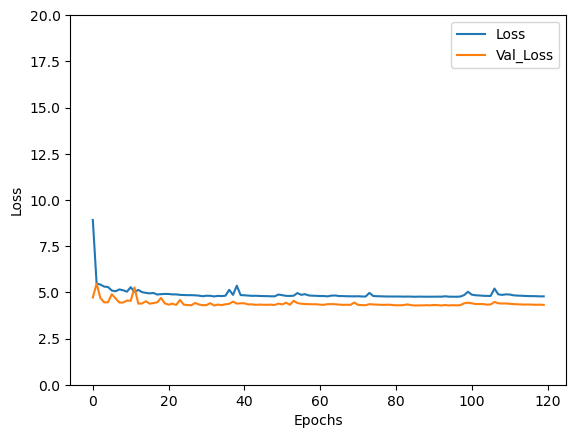

loss epoch plot execute!


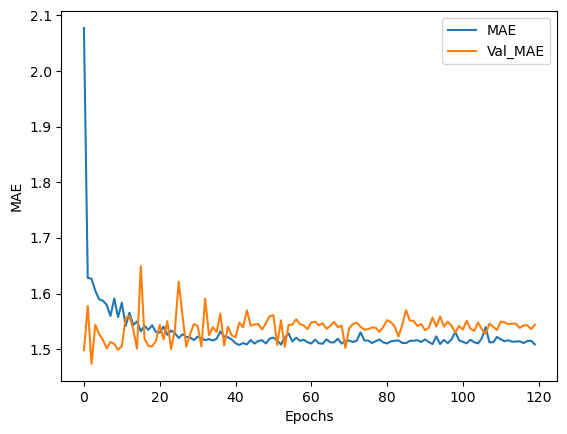

mae epoch plot execute!
coefficient of determination: 0.11976080488741858


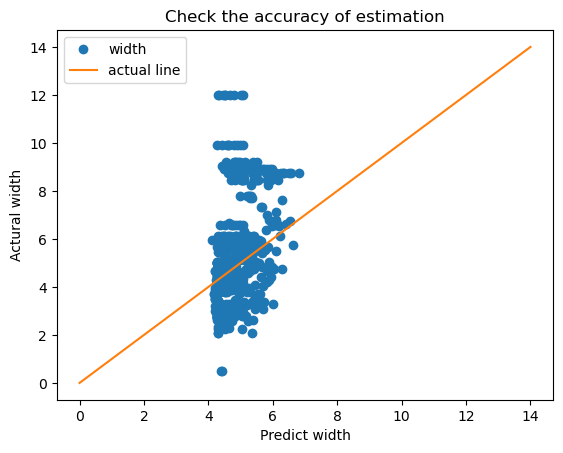

In [18]:
best_model, best_model_hp, history = hp_model_output_information(tuner_HB,X_train_combine, y_train_combine, X_test_combine, y_test_combine)

In [46]:
# check the outlier

In [49]:
import pandas as pd
select_exp = "/Users/kai/Downloads/graduation/Experiment/Labelme/Fluorescence_ex_Kai-kai_Plate705.xlsx"
exp_df_node = pd.read_excel(select_exp,engine = "openpyxl",sheet_name="experiment node",index_col=0)
exp_df_slice = pd.read_excel(select_exp,engine = "openpyxl",sheet_name="experiment slice",index_col=0)
label_df = pd.read_excel(select_exp,engine = "openpyxl",sheet_name="Labelme",index_col=0)

In [51]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("/Users/kai/Downloads/graduation/AMFtrack")
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import json
import imageio
import logging
import cv2
from skimage.measure import profile_line

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    Node,
    Edge,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    plot_full,
    reconstruct_image_from_general,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    plot_full,
)

from amftrack.util.sys import get_current_folders, update_plate_info, test_path
from amftrack.util.plot import show_image
from amftrack.util.sys import storage_path
from amftrack.util.geometry import (
    generate_index_along_sequence,
    centered_bounding_box,
    expand_segment,
    get_section_segment,
    compute_factor,
    generate_index_along_sequence,
    distance_point_pixel_line,
    get_closest_lines,
    get_closest_line_opt,
    intersect_rectangle,
    is_overlapping,
    get_overlap,
    format_region,
    is_in_bounding_box,
    get_bounding_box,
    centered_bounding_box,
)
from amftrack.util.image_analysis import (
    find_transformation,
    get_transformation,
    reverse_transformation,
    convert_to_micrometer,
    find_image_index,
    is_in_image,
    extract_inscribed_rotated_image,
    is_negative_similarity,
    find_similarity,
    find_scaling_factor,
)
from amftrack.util.geometry import generate_index_along_sequence
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    compute_edge_width_profile,
    extract_section_profiles_for_edge,
)

## Outlier check need to check with "Compare New model notebook"
1. check the bias of the new dataset that is higher than 8 and the value lower than 1
2. check the vary focus and ilumination dataset for the width higher than 12

In [110]:
for i in range(len(label_df.iloc[:,1:])):
    print(label_df.iloc[:,1:].index[i])
    # print(label_df.iloc[:,1:].iloc[i])
    print(np.where(label_df.iloc[:,1:].iloc[i] > 8))
label_pos = list(label_df.columns[1:])
print(label_pos[0])
label_pos = list(label_df.columns[1:])
print(label_pos[6])
# pos26, 0 (top)
# pos60, 0 (top), 6(M)

pos3
(array([], dtype=int64),)
pos4
(array([], dtype=int64),)
pos5
(array([], dtype=int64),)
pos6
(array([], dtype=int64),)
pos7
(array([], dtype=int64),)
pos8
(array([], dtype=int64),)
pos9
(array([], dtype=int64),)
pos10
(array([], dtype=int64),)
pos11
(array([], dtype=int64),)
pos12
(array([], dtype=int64),)
pos13
(array([], dtype=int64),)
pos14
(array([], dtype=int64),)
pos15
(array([], dtype=int64),)
pos16
(array([], dtype=int64),)
pos17
(array([], dtype=int64),)
pos18
(array([], dtype=int64),)
pos19
(array([], dtype=int64),)
pos20
(array([], dtype=int64),)
pos21
(array([], dtype=int64),)
pos22
(array([], dtype=int64),)
pos23
(array([], dtype=int64),)
pos24
(array([], dtype=int64),)
pos25
(array([], dtype=int64),)
pos26
(array([0]),)
pos27
(array([], dtype=int64),)
pos28
(array([], dtype=int64),)
pos29
(array([], dtype=int64),)
pos30
(array([], dtype=int64),)
pos31
(array([], dtype=int64),)
pos32
(array([], dtype=int64),)
pos33
(array([], dtype=int64),)
pos34
(array([], dtype=int6

In [111]:
for i in range(len(label_df.iloc[:,1:])):
    print(label_df.iloc[:,1:].index[i])
    print(np.where(label_df.iloc[:,1:].iloc[i] < 1))
label_pos = list(label_df.columns[1:])
print(label_pos)
print(label_pos[9])
label_pos = list(label_df.columns[1:])
print(label_pos[17])

pos3
(array([], dtype=int64),)
pos4
(array([], dtype=int64),)
pos5
(array([], dtype=int64),)
pos6
(array([], dtype=int64),)
pos7
(array([], dtype=int64),)
pos8
(array([], dtype=int64),)
pos9
(array([], dtype=int64),)
pos10
(array([], dtype=int64),)
pos11
(array([], dtype=int64),)
pos12
(array([], dtype=int64),)
pos13
(array([], dtype=int64),)
pos14
(array([], dtype=int64),)
pos15
(array([], dtype=int64),)
pos16
(array([], dtype=int64),)
pos17
(array([], dtype=int64),)
pos18
(array([], dtype=int64),)
pos19
(array([], dtype=int64),)
pos20
(array([], dtype=int64),)
pos21
(array([], dtype=int64),)
pos22
(array([], dtype=int64),)
pos23
(array([], dtype=int64),)
pos24
(array([], dtype=int64),)
pos25
(array([], dtype=int64),)
pos26
(array([], dtype=int64),)
pos27
(array([], dtype=int64),)
pos28
(array([], dtype=int64),)
pos29
(array([], dtype=int64),)
pos30
(array([], dtype=int64),)
pos31
(array([], dtype=int64),)
pos32
(array([], dtype=int64),)
pos33
(array([], dtype=int64),)
pos34
(array([]

In [ ]:
# pos26, 0 (top), it does not exist in node.
# pos60, 0 (top), 6(M) 
# pos48, 9(L), 17(LM2), 9 does not exist in node.

In [66]:
directory_groundtruths = os.path.join(storage_path)
directory = directory_groundtruths +"/"
update_plate_info(directory)
folder_df = get_current_folders(directory)
select = folder_df[folder_df["Plate"] == "705"]
exp = Experiment(directory)
exp.load(select, suffix="")
exp.load_tile_information(0)

analysed:   0%|          | 0/44 [00:00<?, ?it/s]

2022-11-16 03:11:00


In [84]:
label_pos = list(exp_df_node.columns[1:])
nodes_dict = {}
for i in range(len(exp_df_node)):
    pic_pos = exp_df_node.index[i]
    node_dict = {}
    for index, value in enumerate(exp_df_node.iloc[i,1:]):
        if type(value) == str:
            node1, node2 = value.split(",")
            node_dict[label_pos[index]] = [int(node1),int(node2)]
    if len(node_dict) != 0:
        nodes_dict[pic_pos] = node_dict
slices_dict = {}
for i in range(len(exp_df_slice)):
    pic_pos = exp_df_slice.index[i]
    slice_dict = {}
    for index, value in enumerate(exp_df_slice.iloc[i,1:]):
        if type(value) == str:
            first, second= value.replace("[","").replace("]","").split(":")
            slice_dict[label_pos[index]] = [int(first), int(second)]
    if len(slice_dict) != 0:
        slices_dict[pic_pos] = slice_dict

{'top': [673, 503], 'R': [673, 671], 'D': [681, 708], 'M': [681, 673], 'M2': [681, 673], 'L': [681, 628]}
{'top': [308, 311], 'R': [1, 4], 'D': [1, 4], 'M': [0, 3], 'M2': [7, 10], 'L': [153, 157]}


Edge(503,673)

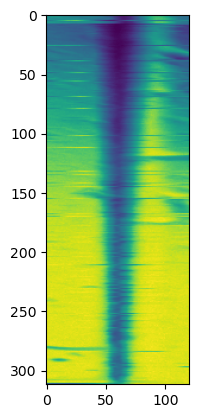

In [169]:
pos = "pos60"
direction = "top"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)
edge

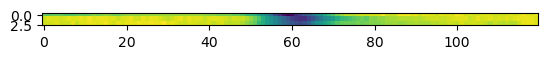

In [104]:
plt.imshow(slices[308:311])

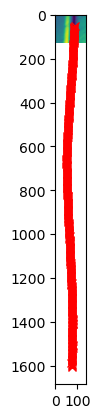

In [ ]:
plot_edge_cropped(edge, 0, mode=3, f=f)

In [ ]:
slices[308]

array([167., 165., 166., 167., 167., 164., 164., 164., 166., 167., 166.,
       168., 172., 169., 171., 173., 172., 169., 169., 172., 174., 174.,
       173., 174., 175., 175., 175., 175., 175., 176., 176., 175., 175.,
       175., 176., 176., 175., 176., 175., 174., 172., 172., 170., 170.,
       170., 170., 167., 166., 164., 158., 156., 154., 146., 141., 134.,
       126., 111., 102.,  92.,  86.,  89.,  99., 105., 114., 119., 126.,
       136., 139., 148., 156., 162., 170., 175., 180., 181., 179., 183.,
       184., 183., 185., 185., 185., 190., 184., 182., 182., 189., 189.,
       190., 187., 188., 184., 187., 186., 186., 183., 187., 186., 186.,
       185., 190., 188., 184., 185., 184., 184., 185., 186., 185., 183.,
       183., 184., 184., 186., 184., 186., 189., 186., 185., 187.])

{'top': [673, 503], 'R': [673, 671], 'D': [681, 708], 'M': [681, 673], 'M2': [681, 673], 'L': [681, 628]}
{'top': [308, 311], 'R': [1, 4], 'D': [1, 4], 'M': [0, 3], 'M2': [7, 10], 'L': [153, 157]}


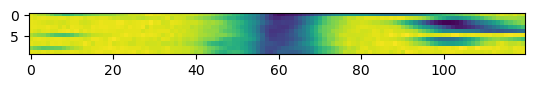

In [96]:
pos = "pos60"
direction = "M"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

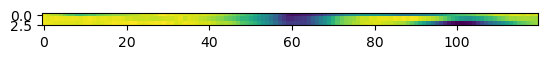

In [97]:
plt.imshow(slices[0:3])

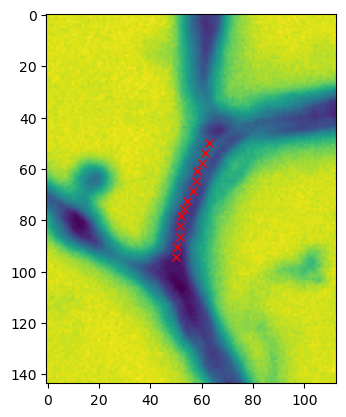

In [98]:
plot_edge_cropped(edge, 0, mode=3, f=f)

{'D': [2120, 2147], 'M': [2116, 2120], 'M2': [2116, 2120], 'LT': [2108, 2080], 'RT': [2107, 2064], 'LM': [2120, 2140], 'LM2': [2120, 2140]}
{'D': [21, 24], 'M': [3, 6], 'M2': [0, 3], 'LT': [38, 41], 'RT': [1, 4], 'LM': [40, 43], 'LM2': [35, 38]}


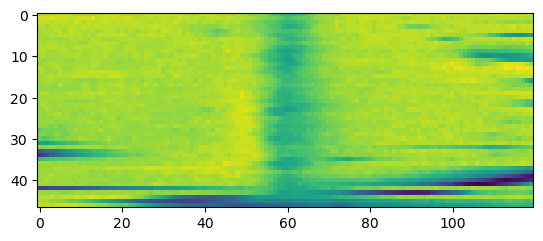

In [93]:
# pos48, 17(LM2)
pos = "pos48"
direction = "LM2"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

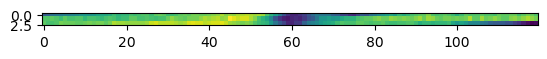

In [94]:
plt.imshow(slices[35:38])

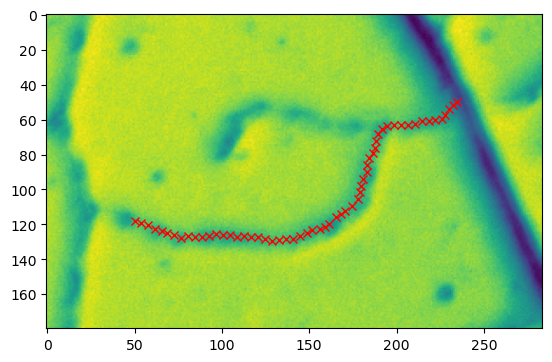

In [95]:
plot_edge_cropped(edge, 0, mode=3, f=f)

# check between 7 and 8

In [ ]:
# check between 7 and 8
for i in range(len(label_df.iloc[:,1:])):
    print(label_df.iloc[:,1:].index[i])
    print(np.where(np.logical_and(label_df.iloc[:,1:].iloc[i] < 8, label_df.iloc[:,1:].iloc[i]>7)))
label_pos = list(label_df.columns[1:])
# pos15, 0 (top)
# pos20, 3 (D)
# pos22, 3 (D)
# pos23, 3 (D)
# pos27, 3 (D)
# pos29, 3 (D)
# pos60, 1 (R) , 7(M2)

{'top': [2137, 2253], 'R': [2202, 2162], 'D': [2137, 2253]}
{'top': [20, 22], 'R': [0, 3], 'D': [17, 20]}


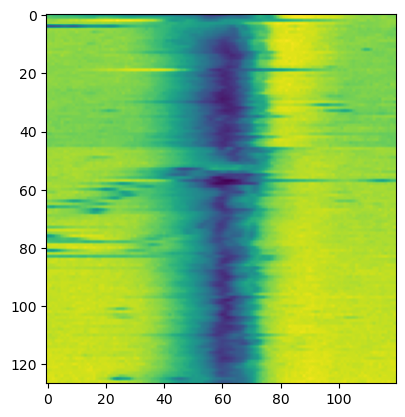

In [140]:
# pos15, 0 (top), [104:105]
pos = "pos15"
direction = "top"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

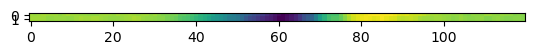

In [142]:
plt.imshow(slices[20:22])

{'top': [2713, 2804], 'R': [2808, 2865], 'D': [2804, 2910], 'L': [2641, 2804]}
{'top': [0, 3], 'R': [0, 3], 'D': [122, 125], 'L': [0, 3]}


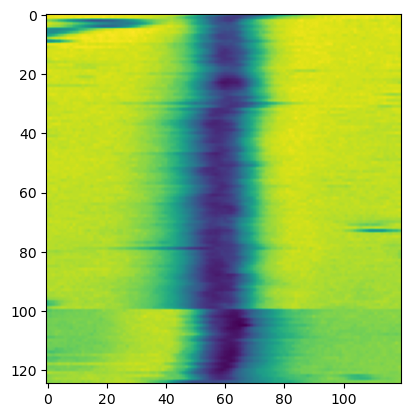

In [146]:
# pos20, 3 (D), y[159:161]
pos = "pos20"
direction = "D"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

array([157., 161., 163., 163., 164., 164., 164., 167., 167., 168., 168.,
       167., 168., 169., 172., 171., 171., 169., 169., 170., 169., 170.,
       171., 171., 171., 169., 171., 172., 173., 173., 174., 175., 173.,
       175., 174., 172., 171., 172., 168., 166., 158., 153., 150., 150.,
       150., 145., 138., 128., 117., 107.,  95.,  86.,  75.,  70.,  61.,
        51.,  46.,  42.,  40.,  41.,  44.,  49.,  56.,  65.,  72.,  78.,
        83.,  88.,  93.,  97., 102., 106., 109., 117., 118., 122., 125.,
       128., 132., 136., 137., 139., 140., 140., 144., 145., 143., 143.,
       139., 143., 148., 149., 150., 151., 154., 156., 154., 153., 152.,
       148., 146., 143., 140., 136., 135., 133., 136., 139., 142., 145.,
       150., 154., 154., 156., 159., 158., 158., 158., 159., 159.])

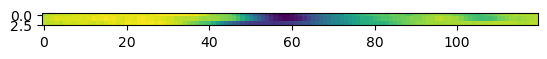

In [147]:
plt.imshow(slices[122:125])

{'top': [2910, 2996], 'R': [2996, 3026], 'D': [2996, 3057]}
{'top': [0, 3], 'R': [0, 3], 'D': [160, 163]}


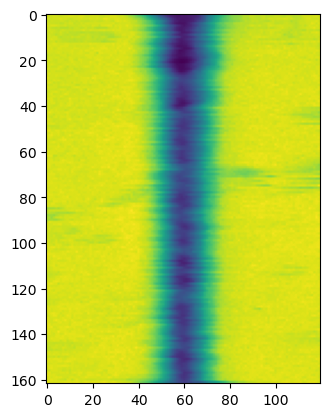

In [150]:
# pos22, 3 (D), [177:178]
pos = "pos22"
direction = "D"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

array([194., 195., 196., 194., 194., 192., 191., 190., 188., 194., 194.,
       188., 193., 196., 193., 192., 193., 191., 190., 190., 190., 191.,
       192., 191., 191., 192., 192., 192., 189., 189., 187., 188., 188.,
       187., 188., 183., 180., 182., 183., 181., 179., 176., 174., 171.,
       167., 163., 160., 153., 149., 139., 133., 128., 120., 111., 100.,
        91.,  82.,  73.,  67.,  62.,  58.,  62.,  67.,  77.,  85.,  92.,
       102., 110., 122., 135., 142., 146., 152., 160., 168., 176., 180.,
       184., 181., 186., 188., 189., 190., 190., 191., 194., 193., 195.,
       196., 195., 196., 194., 193., 193., 193., 196., 196., 194., 195.,
       197., 197., 196., 195., 195., 194., 196., 196., 194., 195., 195.,
       197., 194., 194., 197., 193., 194., 195., 194., 195., 195.])

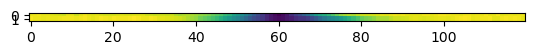

In [151]:
plt.imshow(slices[160:163])

{'top': [3057, 2996], 'D': [3057, 3067], 'M': [3057, 3067], 'M2': [3057, 3067], 'L': [3057, 3070], 'L2': [3057, 3070], 'L3': [3057, 3070], 'L4': [3057, 3070], 'L5': [3057, 3070]}
{'top': [0, 3], 'D': [25, 27], 'M': [1, 3], 'M2': [4, 6], 'L': [58, 59], 'L2': [55, 58], 'L3': [47, 48], 'L4': [42, 43], 'L5': [38, 39]}


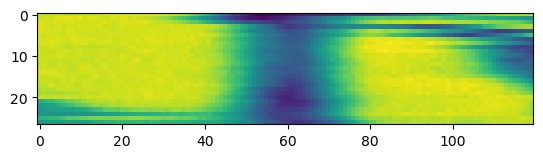

In [152]:
# pos23, 3 (D), [182:183]
pos = "pos23"
direction = "D"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

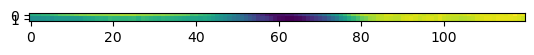

In [154]:
plt.imshow(slices[25:27])

{'top': [673, 503], 'R': [673, 671], 'D': [681, 708], 'M': [681, 673], 'M2': [681, 673], 'L': [681, 628]}
{'top': [308, 311], 'R': [1, 4], 'D': [1, 4], 'M': [0, 3], 'M2': [7, 10], 'L': [153, 157]}


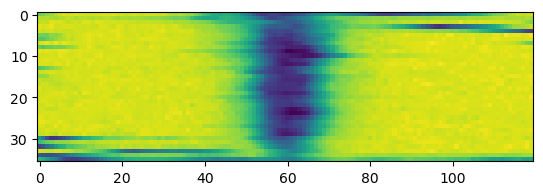

In [157]:
# pos60, 1 (R) [490:492] 
pos = "pos60"
direction = "R"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

{'top': [673, 503], 'R': [673, 671], 'D': [681, 708], 'M': [681, 673], 'M2': [681, 673], 'L': [681, 628]}
{'top': [308, 311], 'R': [1, 4], 'D': [1, 4], 'M': [0, 3], 'M2': [7, 10], 'L': [153, 157]}


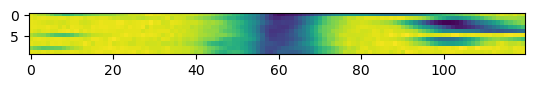

In [158]:
# pos60, 7(M2), [499:501]
pos = "pos60"
direction = "M2"
print(nodes_dict[pos])
print(slices_dict[pos])
edge = nodes_dict[pos][direction]
edge = get_edge_from_node_labels(exp, 0, edge[0], edge[1])
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=5, step=1)
slices, coords1, coords2 = f_profiles(edge)
plt.imshow(slices)

# check Felix ground truth > 8

In [172]:
def get_labelme_segments(directory):
    # https://github.com/wkentaro/labelme
    labelme_dict = {}
    def load_labelmefile(file):
        with open(file) as r:
            return json.load(r)
    for labelmefiles in os.listdir(directory):
        if ".json" in labelmefiles:
            labelme_path = os.path.join(directory,labelmefiles)
            labelmefile = load_labelmefile(labelme_path)
            for shape in labelmefile["shapes"]:
                if shape["label"] in labelme_dict.keys():
                    labelme_dict[shape["label"]].append(shape["points"])
                else:
                    labelme_dict[shape["label"]]= [shape["points"]]
    return labelme_dict
segment = get_labelme_segments("/Users/kai/Downloads/graduation/Experiment/Labelme/20220714_plate_120_groundtruths_close_up")

In [173]:
import numpy as np
def compute_width_from_segment(segment):
    def convert_to_micrometer(pixel_length,camera_res=3.45, magnification=50):
        """
        Converts pixels into micrometers, based on the magnification of the microscope.
        """
        return pixel_length * camera_res / magnification
    width_dict = {}
    width_std_dict = {}
    for key in segment.keys():
        widths = []
        for point1,point2 in segment[key]:
            point1 = np.array(point1)
            point2 = np.array(point2)
            width = convert_to_micrometer(np.linalg.norm(point1 - point2), magnification=50)
            widths.append(width)
        width_dict[key] = np.mean(widths)
        width_std_dict[key] = np.std(widths)
    return width_dict, width_std_dict
width_dict,width_std_dict= compute_width_from_segment(segment)

In [179]:
keep_key = []
for key, value in width_dict.items():
    if value > 8:
        keep_key.append((key,value))
keep_key.sort()
keep_key

[('w001', 8.736647060062348),
 ('w002', 8.979951193711909),
 ('w011', 8.439496956758736),
 ('w025', 11.986017390352313),
 ('w026', 9.216215073150575),
 ('w027', 11.653229887907479),
 ('w028', 11.248169550363947),
 ('w033', 8.920965974803757),
 ('w035', 9.016719836192376),
 ('w040', 9.917170833534643)]